In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2024-09-24 03:34:18.118731: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 03:34:18.328626: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 03:34:18.459725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 03:34:18.755429: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 03:34:18.823654: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 03:34:19.372327: I tensorflow/core/platform/cpu_feature_gu

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

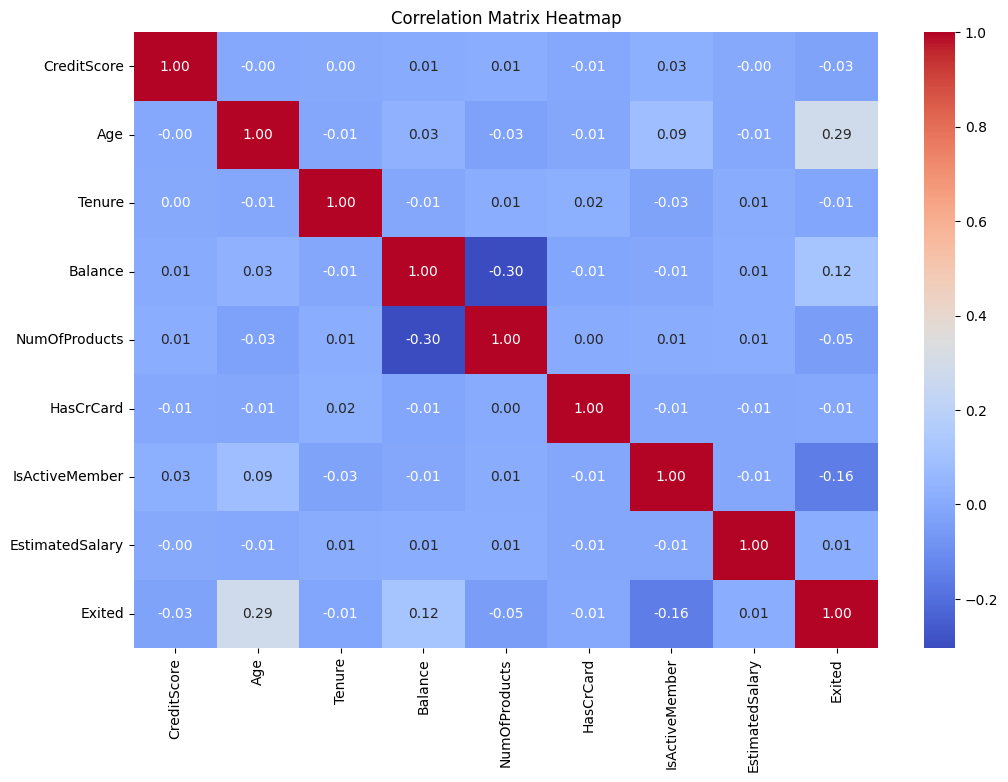

In [3]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = dataset[
    [
        "CreditScore",
        "Age",
        "Tenure",
        "Balance",
        "NumOfProducts",
        "HasCrCard",
        "IsActiveMember",
        "EstimatedSalary",
        "Exited",
    ]
].corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

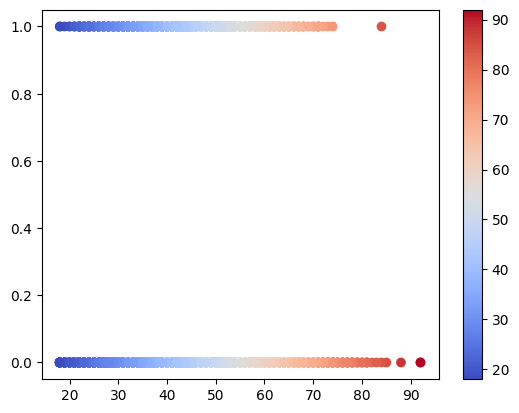

In [4]:
plt.scatter(dataset["Age"], dataset["Exited"], c=dataset["Age"], cmap="coolwarm")
plt.colorbar()
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Epoch 1/100


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4787 - loss: 0.7191 - val_accuracy: 0.7965 - val_loss: 0.5212
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8018 - loss: 0.4960 - val_accuracy: 0.7975 - val_loss: 0.4501
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.7933 - loss: 0.4527 - val_accuracy: 0.8005 - val_loss: 0.4371
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8022 - loss: 0.4335 - val_accuracy: 0.8115 - val_loss: 0.4306
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8037 - loss: 0.4290 - val_accuracy: 0.8140 - val_loss: 0.4248
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.8055 - loss: 0.4263 - val_accuracy: 0.8165 - val_loss: 0.4202
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.8134 - loss: 0.4193 - val_accuracy: 0.8185 - val_loss: 0.4160
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.8122 - loss: 0.4104 - val_accu

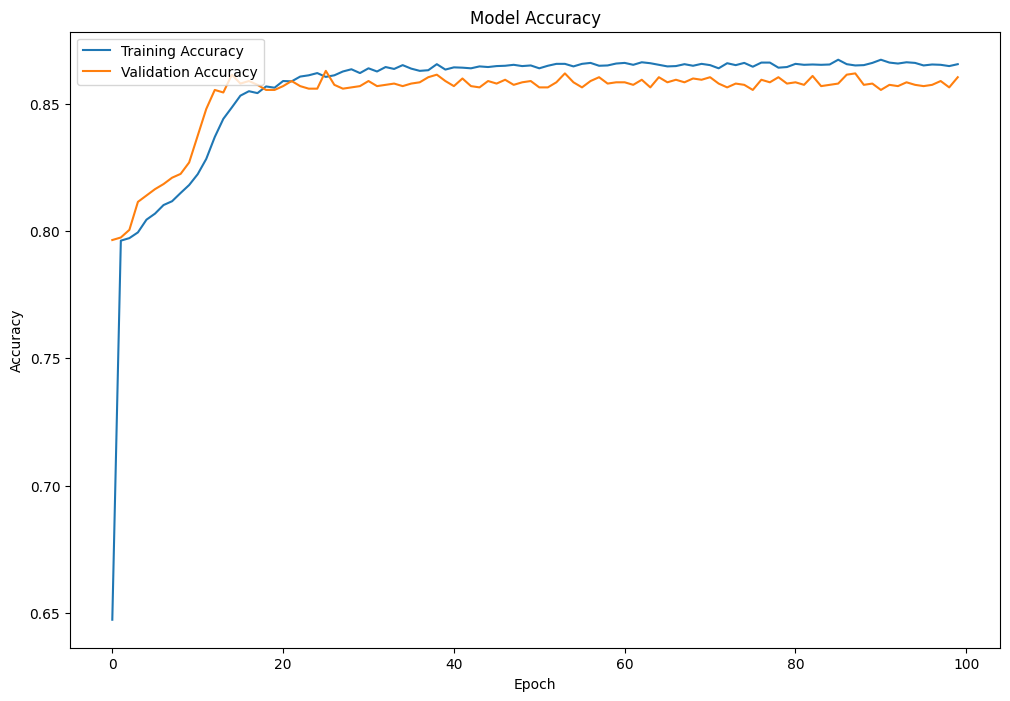

In [11]:
# BEGIN: Capture the history of the training process
history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Plot the accuracy change
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
# END:

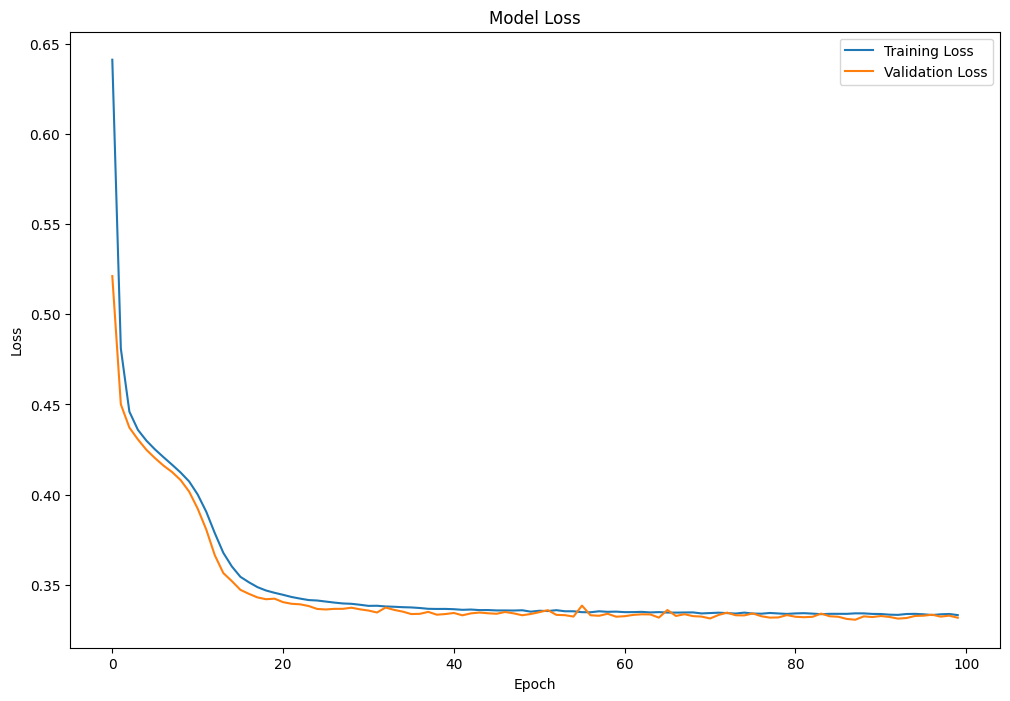

In [12]:
# Plot the loss change
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [13]:
customer = [[1, 0, 0, 600, 1,  40, 3, 60000, 2, 1, 1, 50000]]
print(ann.predict(sc.transform(customer)) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[False]]


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, ann.predict(X_test) > 0.5))
print(accuracy_score(y_test, ann.predict(X_test) > 0.5))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
[[1525   70]
 [ 209  196]]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
0.8605
